In [44]:
import numpy as np
import matplotlib.pyplot as plt

sensor_names = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyr_x', 'Gyr_y', 'Gyr_z']
label_names = ["DNE", "Resting", "Walking", "Running", "Driving"]

In [24]:
labels = np.loadtxt('labels_train_1.csv', dtype='int')
data_slice_0 = np.loadtxt(sensor_names[0] + '_train_1.csv',
                            delimiter=',')
data = np.empty((data_slice_0.shape[0], data_slice_0.shape[1],
                    len(sensor_names)))
data[:, :, 0] = data_slice_0
del data_slice_0
for sensor_index in range(1, len(sensor_names)):
    data[:, :, sensor_index] = np.loadtxt(
        sensor_names[sensor_index] + '_train_1.csv', delimiter=',')

acc_data = data[:,:, 0:3]
gyr_data = data[:,:, 3:6]


In [47]:
# calculate total acceleration

# take the l2 norm to get the total magnitude of acceration.
total_acc = np.linalg.norm(acc_data, axis=-1)
total_gyr = np.linalg.norm(gyr_data, axis=-1)

avg_acc = np.mean(total_acc, axis=1)
avg_gyr = np.mean(total_gyr, axis=1)


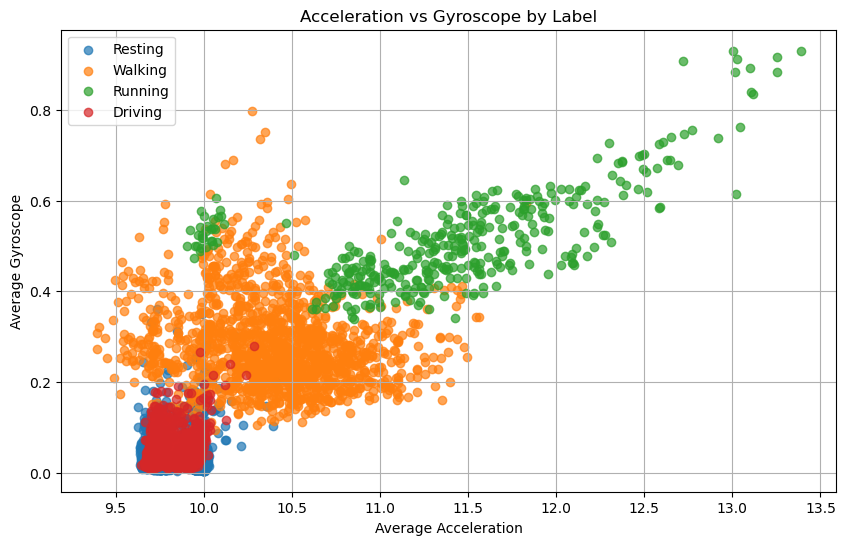

In [48]:
unique_labels = np.unique(labels)
plt.figure(figsize=(10, 6))

for label in unique_labels:
    # Filter data for the current label
    mask = labels == label
    plt.scatter(
        avg_acc[mask],  # X-axis
        avg_gyr[mask],    # Y-axis
        label=label_names[label],     # Legend label
        alpha=0.7                   # Transparency for better visualization
    )

plt.title('Acceleration vs Gyroscope by Label')
plt.xlabel('Average Acceleration')
plt.ylabel('Average Gyroscope')
plt.legend()
plt.grid(True)
plt.show()